# Analysing and plotting pyOM data

## Loading the python modules

In [2]:
#import modules
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy import signal

# equivalent to rcParams['animation.html'] = 'html5'
#rc('animation', html='html5')

## Defining functions for plotting

In [56]:
#define functions for plotting
def animate(i):
    #img = ax.pcolor(v[i,zmax-1,:,:])
    vec.set_UVC(u[i,:,:],v[i,:,:])
    return (vec)

def quiver(x,y,u,v):
    '''makes a quiver plot of a given velocity field'''
    fig, ax = plt.subplots(figsize=(12,12))
    vec = ax.quiver(x,y,u,v,alpha = 0.5)
    plt.title('Velocity Quiver Plot')
    plt.xlabel('Length [cm]')
    plt.ylabel('Width [cm]')
    return fig,ax,vec

def animate_quiver(x,y,t,u,v):
    '''Animates A quiver plot of a velocity field'''
    fig, ax,vec = quiver(x,y,u[0,:,:],v[0,:,:])
    anim = animation.FuncAnimation(fig, animate, blit=False, frames = t.shape[0])
    HTML(anim.to_html5_video())
    return anim

def load_data(fname):
    data = xr.open_dataset("CDF Files\\"+fname)
    u = np.array(data['u'])*10**5
    v = np.array(data['v'])*10**5
    x = np.array(data['xu'])*10**5
    y = np.array(data['yu'])*10**5
    time = np.array(data['Time'])
    return x,y,u,v,time

#calculate wavelength of rossby wave
def wavelen(u,omega,slope,H0):
    return np.sqrt(4*np.pi**2*u*H0/(2*omega/60*slope*2*np.pi))

## Analysis of the first file

In [70]:
fname = 'no_ridge_disk_01'
fname = 'slow_narrow_ridge'
x,y,u,v,t = load_data('small_'+fname+'.cdf')
h0 = 120
u0 = 0.1
omega = 15
alpha = 0.2
print(np.max(x))

118.99999808520079


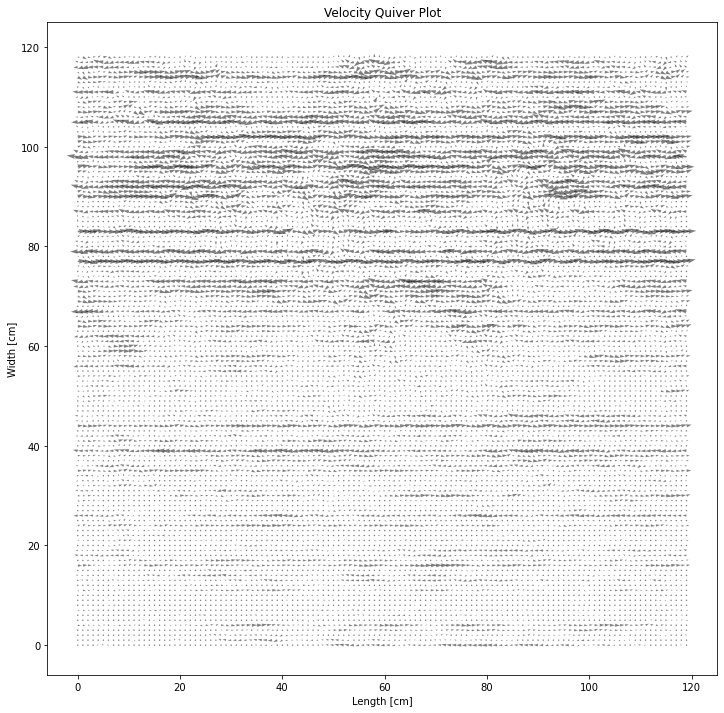

In [71]:
quiver(x,y,u[-1,:,:],v[-1,:,:])
plt.savefig('long_tank')

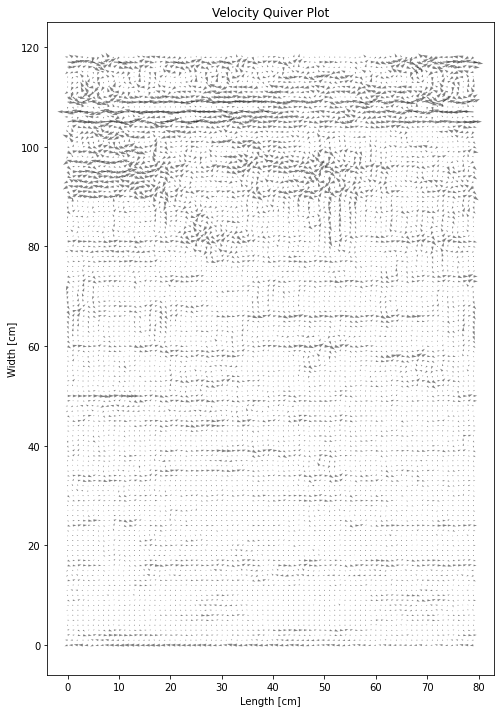

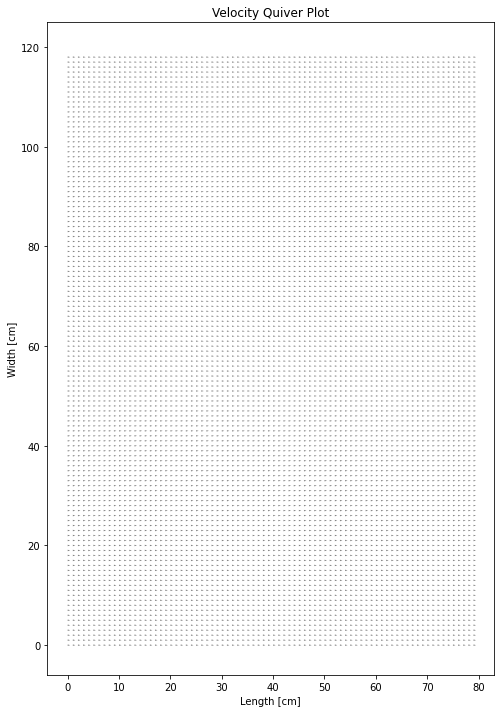

In [12]:
fig,ax,vec = quiver(x,y,u[0,:,:],v[0,:,:])
anim = animate_quiver(x,y,t,u,v)

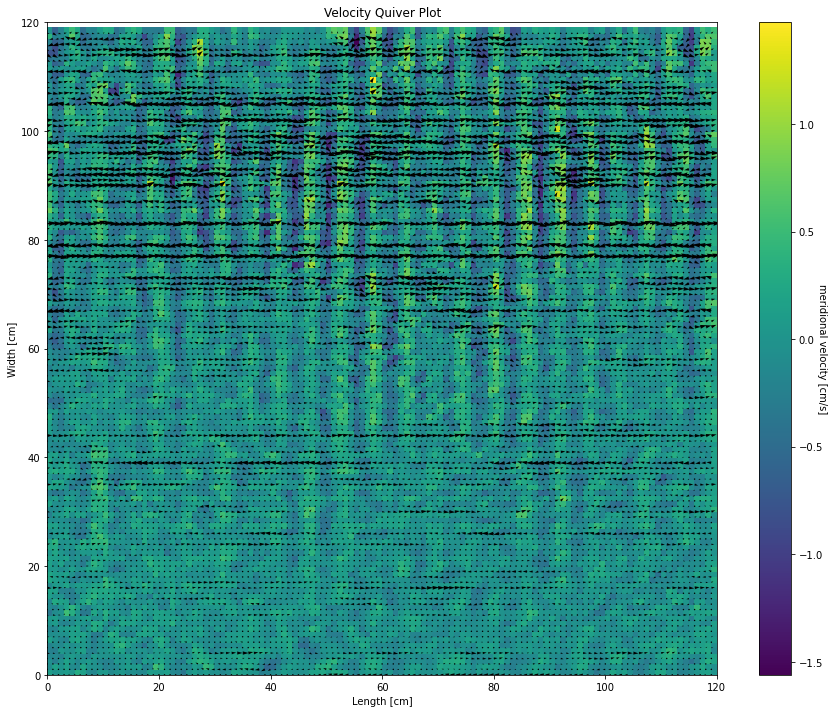

In [72]:
#surface animation
time = -1
fig, ax = plt.subplots(figsize=(15,12))
img = ax.pcolor(v[time,:,:])
cbar = fig.colorbar(img)
cbar.set_label('meridional velocity [cm/s]', rotation=270)
vec = ax.quiver(x,y,u[time,:,:],v[time,:,:])
plt.title('Velocity Quiver Plot')
plt.xlabel('Length [cm]')
plt.ylabel('Width [cm]')
plt.savefig(fname+'.png')
anim = animation.FuncAnimation(fig, animate, blit=False,frames=v.shape[0])


In [14]:
anim


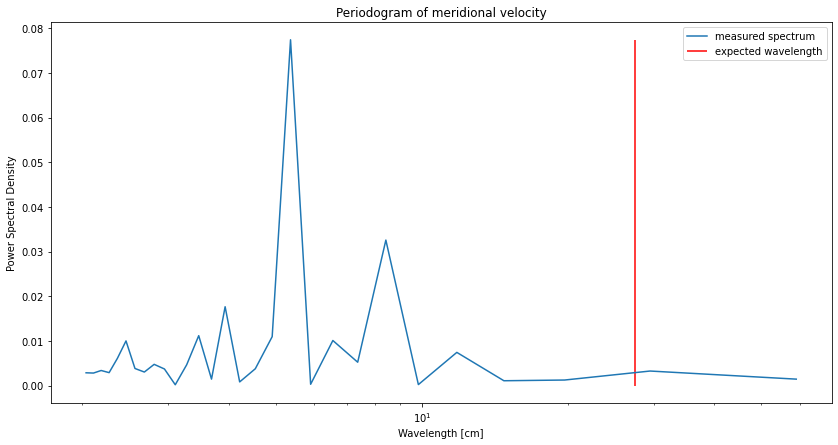

In [69]:
freq,power = signal.periodogram(np.nanmean(v[-1,:-1,:],axis=1))
lambda_ = wavelen(u0,omega,alpha,h0)
plt.figure(figsize=(14,7))
plt.semilogx(1/freq[1:],power[1:],label='measured spectrum')
plt.vlines(lambda_,0,max(power),'red',label='expected wavelength')
plt.legend()
plt.xlabel('Wavelength [cm]')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of meridional velocity')
plt.savefig(fname+'_spec.png')

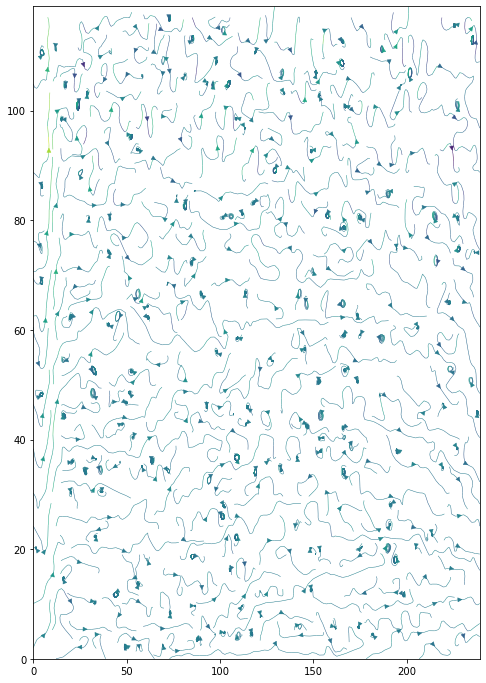

In [46]:
plt.figure(figsize=(8,12))
x = np.arange(v.shape[2])
y = np.arange(v.shape[1])
plt.streamplot(x,y,u[-1,:,:],v[-1,:,:],density=2,linewidth=0.5,color=v[-1,:,:])

In [28]:
np.nanmean(v[-1,:-1,:],axis=1)

array([-0.02554992,  0.00682031,  0.03859708, -0.03544298, -0.0089695 ,
        0.02336787, -0.0188774 , -0.01758306,  0.00679821, -0.00859081,
       -0.00070131, -0.0130773 , -0.00328665, -0.00250051, -0.02135121,
       -0.00992042,  0.01632436, -0.020871  , -0.02260434,  0.00994117,
       -0.00609836, -0.01403145, -0.02015595, -0.00778601,  0.02162002,
       -0.01886215, -0.03243911,  0.00843329,  0.00337556, -0.01205031,
       -0.01437282, -0.00590813,  0.0090324 , -0.01204343, -0.01337614,
        0.00797336,  0.00539718, -0.04205429,  0.02352063,  0.00181726,
       -0.01789798,  0.01208158, -0.01911847,  0.01332263, -0.02608572,
        0.04051503, -0.01440991, -0.03334112,  0.04009899, -0.01737562,
        0.00974676, -0.01213269,  0.01984585,  0.00855517, -0.02974835,
        0.01608778, -0.00907975,  0.03895901, -0.04167036,  0.01640205,
        0.02085991, -0.02457726,  0.0094641 , -0.00330259, -0.00742469,
        0.02673562,  0.00019629, -0.03249678,  0.00696615,  0.00